In [118]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [2]:
pima=pd.read_csv("Cars-dataset.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=pima.copy()

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0


In [6]:
data.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
413,29,Male,1,1,8,13.9,17.1,0,0
414,25,Male,1,0,3,9.9,17.2,0,0
415,27,Female,0,0,4,13.9,17.3,0,0
416,26,Male,1,1,2,9.9,17.7,0,0
417,23,Male,0,0,3,9.9,17.9,0,0


### Understand the shape of the dataset.

In [7]:
data.shape

(418, 9)

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,418.0,0.260766,0.439578,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.306220,3.722143,3.2,8.600,10.9,13.575,23.4
license,418.0,0.205742,0.404727,0.0,0.000,0.0,0.000,1.0
Opt_service,418.0,0.083732,0.277317,0.0,0.000,0.0,0.000,1.0


### EDA

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

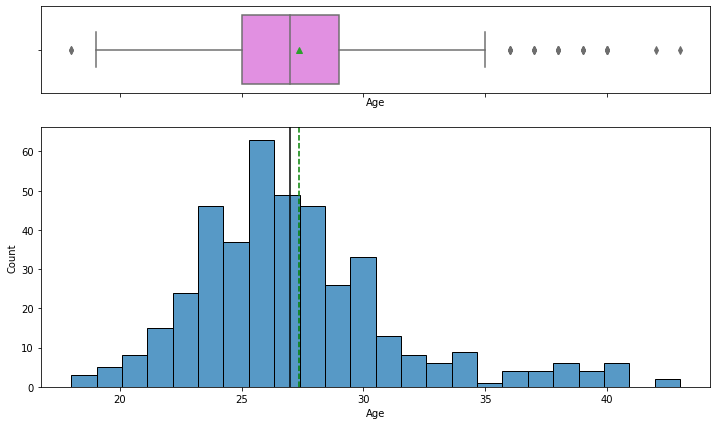

In [12]:
histogram_boxplot(data, "Age")

### Observations on Work Experience

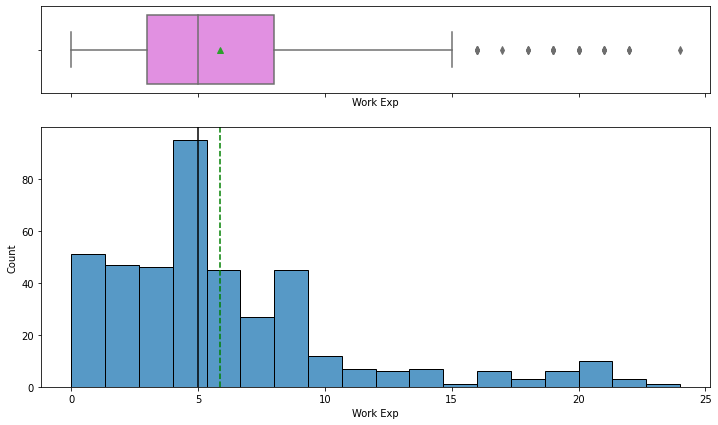

In [14]:
histogram_boxplot(data,"Work Exp")

### Observations on Salary

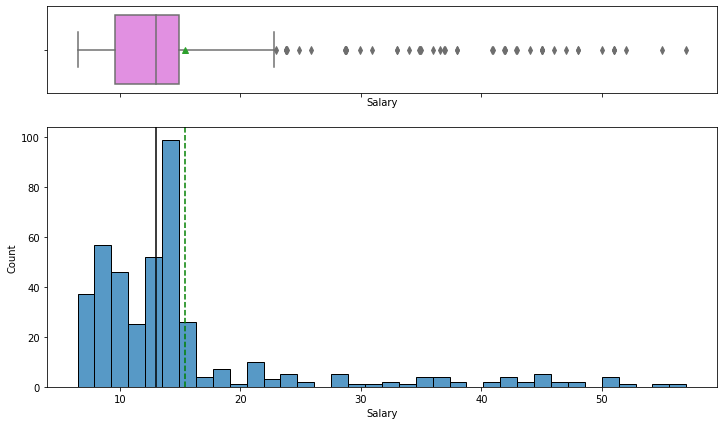

In [15]:
histogram_boxplot(data,"Salary")

### Observations on Distance

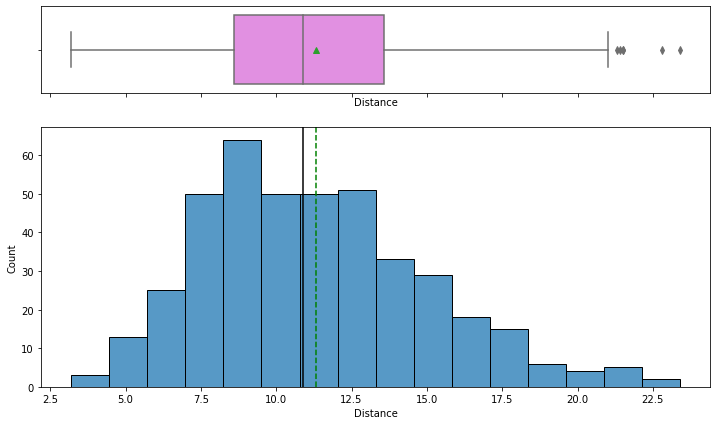

In [17]:
histogram_boxplot(data,"Distance")

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Gender

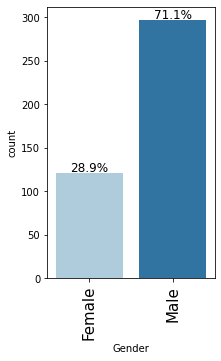

In [20]:
labeled_barplot(data,"Gender",perc=True)

### Observations on Engineer

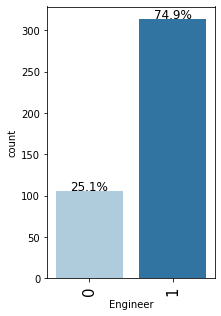

In [21]:
labeled_barplot(data,"Engineer",perc=True)

### Observations on MBA

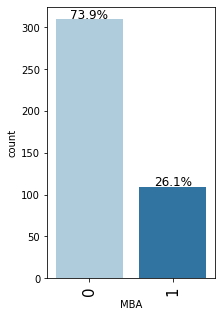

In [23]:
labeled_barplot(data,"MBA",perc=True)

### Observations on License

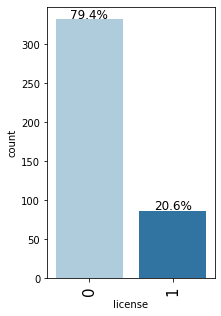

In [25]:
labeled_barplot(data,"license",perc=True)

### Observations on Opted for service

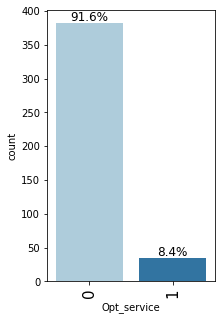

In [27]:
labeled_barplot(data,"Opt_service",perc=True)

### Bivariate Analysis

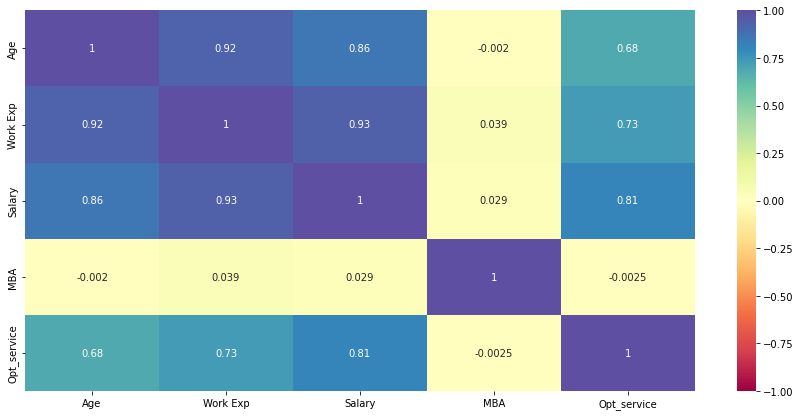

In [79]:
plt.figure(figsize=(15,7))
sns.heatmap(data[['Age', 'Work Exp', 'Salary', 'MBA', 'Opt_service']].corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

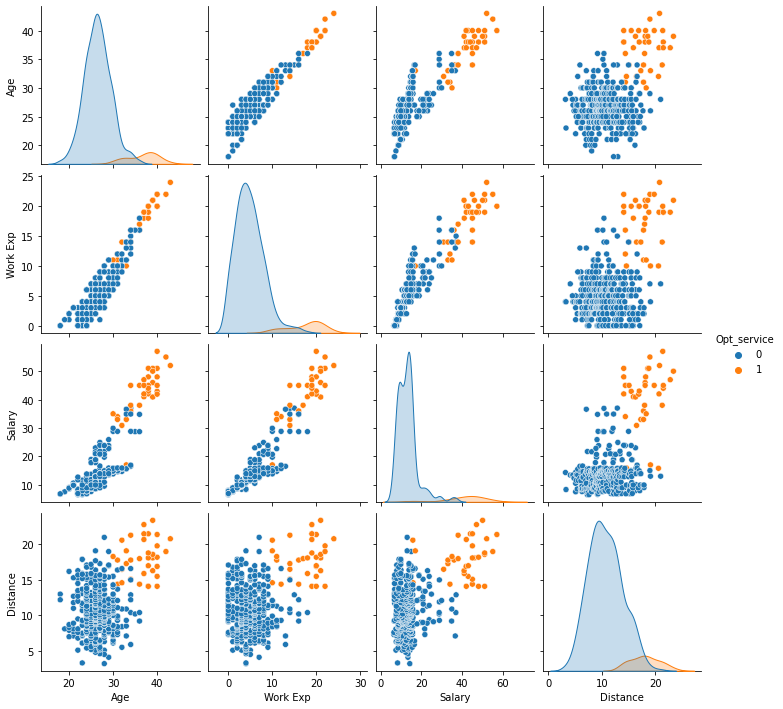

In [33]:
sns.pairplot(data=data[['Age', 'Work Exp', 'Salary', 'Distance', 'Opt_service']],hue="Opt_service")
plt.show()

In [36]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="Opt_service",y=data[x],palette="PuBu")
    plt.show()

In [35]:
data.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Opt_service'],
      dtype='object')

### Opt_service vs Age

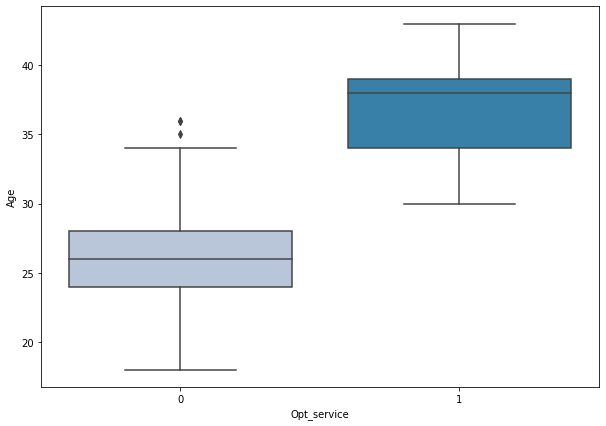

In [37]:
boxplot('Age')

### Opt_service vs Work Exp

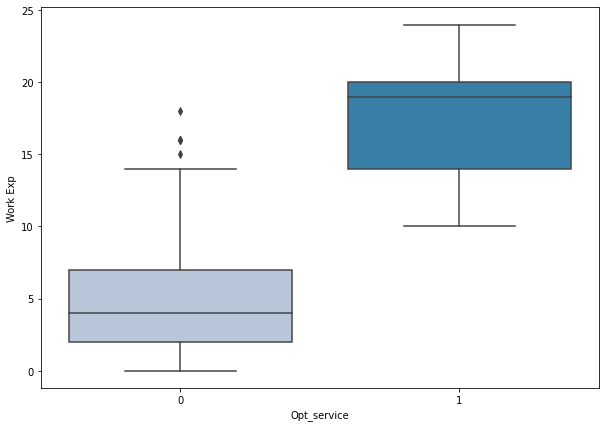

In [38]:
boxplot('Work Exp')

### Opt_service vs Salary

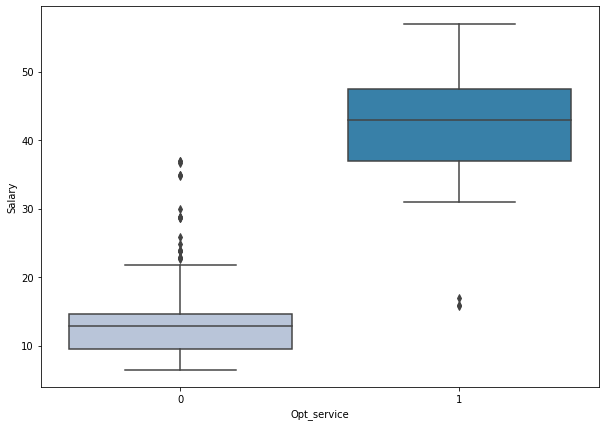

In [39]:
boxplot('Salary')

### Opt_service vs Distance

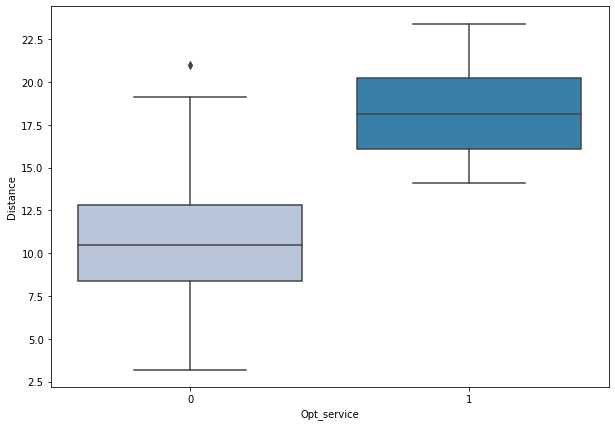

In [40]:
boxplot('Distance')

## Split Data

In [95]:
X = data.drop('Opt_service',axis=1)
y = data['Opt_service'] 
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [96]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(292, 8) (126, 8)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [97]:
y.value_counts(1)

0    0.916268
1    0.083732
Name: Opt_service, dtype: float64

In [98]:
y_test.value_counts(1)

0    0.912698
1    0.087302
Name: Opt_service, dtype: float64

In [99]:
y_test.value_counts(1)

0    0.912698
1    0.087302
Name: Opt_service, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a person will not take the bus and person wanted to take the bus.
2. Predicting a person will take the bus, and the person doesn't take the bus.

### Which case is more important? 
* Predicting a person will take the bus, and the person doesn't take the bus.
* Predicting a person will not take the bus, and the person does take the bus.

### Which metric to optimize?
* We would want F1 score to be maximized, the greater the F1 score higher the chances of minimizing false positives and false negatives as well. Because if a model predicts that a person is going to take the bus and in reality, that person doesn't take the bus but also if the model predicts te


**Let's define a function to provide recall scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [100]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [101]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.992063     1.0   0.916667  0.956522


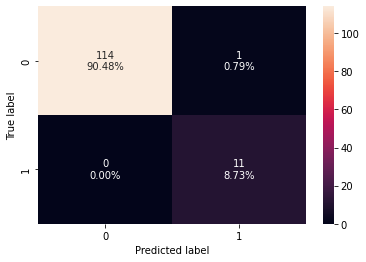

In [102]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1, class_weight={0:0.084,1:0.916})
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.992063     1.0   0.916667  0.956522


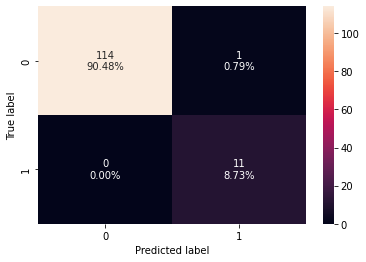

[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END ...............min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END ...............min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END ...............min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END ...............min_

[CV] END ...............min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END ...............min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END ...............min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END ...............min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END ...............min_

In [127]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0  0.989726  0.916667   0.956522  0.93617
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.992063     1.0   0.916667  0.956522


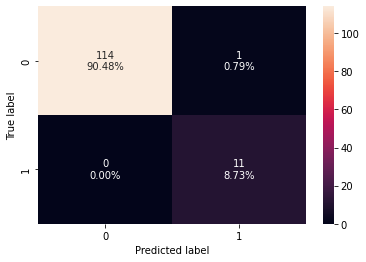

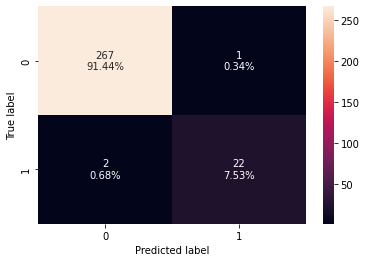

In [123]:
#Fitting the model
bagging_classifier = BaggingClassifier(LogisticRegression(), 
                                       random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

* Bagging classifier giving a similar performance as random forest.
* It is also overfitting the training data and lower test recall than decision trees.

### Tuning Decision Tree

In [68]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.084,1:0.916},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.084, 1: 0.916}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.979452     1.0        0.8  0.888889
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.944444  0.909091      0.625  0.740741


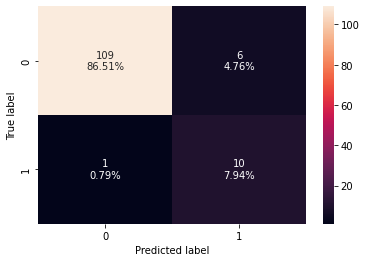

In [69]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Random Forest

In [126]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {  
#                 'max_depth': list(np.arange(4,10,2)),
#                 'max_features': np.arange(0.6,1.1,0.2),
#                 'max_samples': np.arange(0.6,1.1,0.2),
                'min_samples_split': [2,5,7],
                'n_estimators': [10,30,50,70],
#                 'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1, verbose=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomForestClassifier(n_estimators=30, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996575  0.958333        1.0  0.978723
Testing performance:
    Accuracy    Recall  Precision    F1
0  0.944444  0.818182   0.642857  0.72


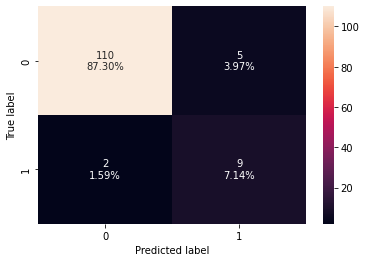

In [71]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Bagging Classifier

In [107]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
# parameters = {'max_samples': [0.7,0.8,0.9,1], 
#               'max_features': [0.7,0.8,0.9,1],
#               'n_estimators' : [10,20,30,40,50],
#              }
parameters = {'max_depth' : np.arange(1,6)}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


ValueError: Invalid parameter max_depth for estimator BaggingClassifier(random_state=1). Check the list of available parameters with `estimator.get_params().keys()`.

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision    F1
0  0.944444  0.818182   0.642857  0.72


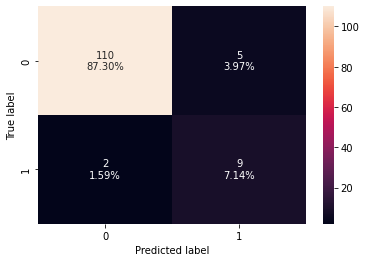

In [73]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.
* The confusion matrix shows that the model is not good at identifying patients who are at risk of diabetes.

## Comparing all the models

In [74]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,1.0,0.979452,1.0,0.996575,0.996575,1.0
Recall,1.0,1.000000,1.0,0.958333,1.000000,1.0
Precision,1.0,0.800000,1.0,1.000000,0.960000,1.0
F1,1.0,0.888889,1.0,0.978723,0.979592,1.0


In [75]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,0.960317,0.944444,0.944444,0.944444,0.936508,0.944444
Recall,0.909091,0.909091,0.818182,0.818182,0.818182,0.818182
Precision,0.714286,0.625000,0.642857,0.642857,0.600000,0.642857
F1,0.800000,0.740741,0.720000,0.720000,0.692308,0.720000


* A tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.

### Feature importance of tuned decision tree

In [76]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Salary <= 29.85
|   |--- Distance <= 17.80
|   |   |--- weights: [22.01, 0.00] class: 0
|   |--- Distance >  17.80
|   |   |--- weights: [0.42, 0.92] class: 1
|--- Salary >  29.85
|   |--- weights: [0.08, 21.07] class: 1



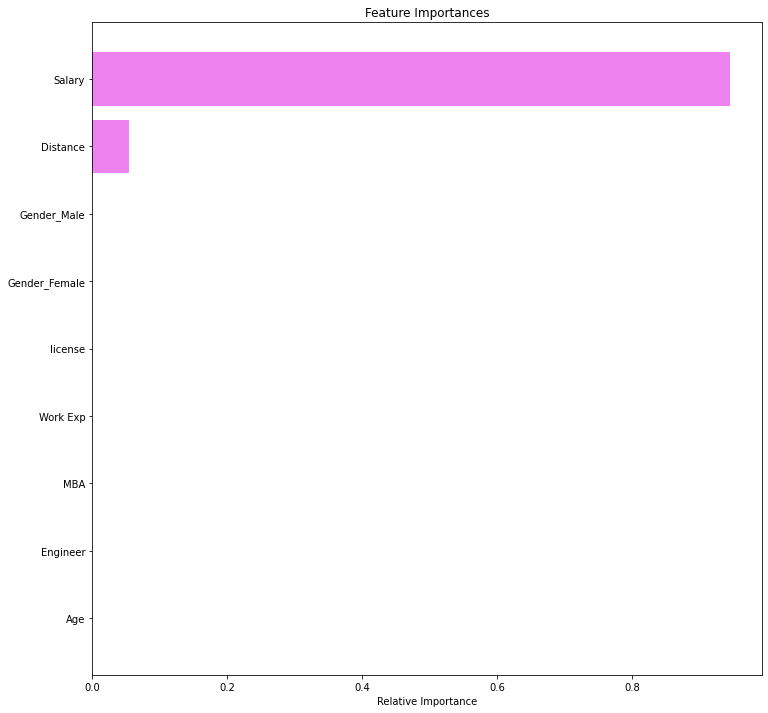

[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=15, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=15, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=15, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=15, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=10, n_estimators=40; total time=

[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.001, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.001, min_samples_split=15, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=80; total time=   0.2s

In [77]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We can see that Glucose concentration is the most important feature followed by Age and BMI.
* The tuned decision tree is using only three variables to separate the two classes. 

## Conclusion
* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 